In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## Importing Given Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from statsmodels.tsa.stattools import adfuller

In [ ]:
# data_final = pd.read_csv('/content/gdrive/MyDrive/Mukund/MLDL/internship/gramoday/data/Agra-Potato-01JAN-to-31DEC-2020_1.csv', index_col = 'Price Date')
data = pd.read_csv('/content/gdrive/MyDrive/Mukund/MLDL/internship/gramoday/data/Agra-Potato-01JAN-to-31DEC-2020_1.csv')
data.columns = ['district_name', 'market_name', 'commodity', 'variety', 'grade', 'min_price', 'max_price', 'modal_price', 'price_date']

data['price_date'] = pd.to_datetime(data['price_date'])
data['price_date'] = pd.to_datetime(data['price_date'], format="%Y/%m/%d")

data['year_month'] = data['price_date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
data.head()

,district_name,market_name,commodity,variety,grade,min_price,max_price,modal_price,price_date,year_month
0,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30,2020-12
1,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29,2020-12
2,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28,2020-12
3,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27,2020-12
4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26,2020-12


In [ ]:
data_with_index = pd.read_csv('/content/gdrive/MyDrive/Mukund/MLDL/internship/gramoday/data/data_with_index.csv',index_col=0,parse_dates=True)

In [ ]:
data_with_index.head()

,district_name,market_name,commodity,variety,grade,min_price,max_price,modal_price,price_date,year_month.1
year_month,,,,,,,,,,
2020-12-01,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30,2020-12
2020-12-01,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29,2020-12
2020-12-01,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28,2020-12
2020-12-01,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27,2020-12
2020-12-01,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26,2020-12


In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
Sales_cycle,Sales_trend = hpfilter(data['modal_price'], lamb=129600)


In [ ]:
data['trend'] = Sales_trend


In [ ]:
data.head()

,district_name,market_name,commodity,variety,grade,min_price,max_price,modal_price,price_date,year_month,trend
0,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30,2020-12,1301.452039
1,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29,2020-12,1343.074771
2,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28,2020-12,1384.694792
3,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27,2020-12,1426.305585
4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26,2020-12,1467.896893


In [ ]:
#Grouping Sales month
data1 = data[['year_month','modal_price','trend']]
data_Sales=data1.groupby(['year_month']).sum()
print(data_Sales.head())

            modal_price          trend
year_month                            
2020-01          237805  237284.424570
2020-02          170365  190996.852024
2020-03          169150  174026.605420
2020-04          250860  234217.790100
2020-05          273065  267629.238213


In [ ]:
#Grouping Sales month
data_Sales=data_with_index.groupby(['year_month']).sum()
print(data_Sales.head())

            min_price  max_price  modal_price
year_month                                   
2020-01-01     221180     244880       237805
2020-02-01     154150     175360       170365
2020-03-01     158760     179810       169150
2020-04-01     236700     262920       250860
2020-05-01     259130     284400       273065


### Plot the dataset

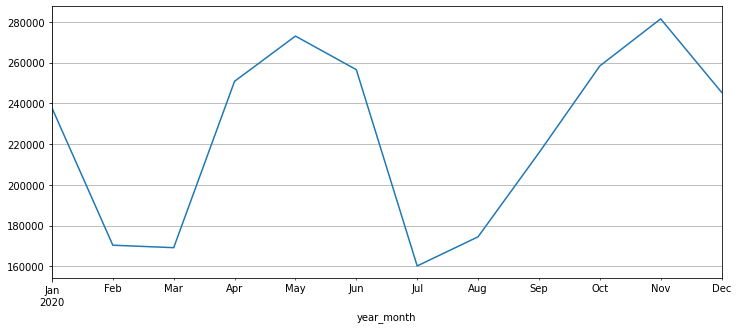

In [ ]:
data_Sales['modal_price'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
plt.grid()

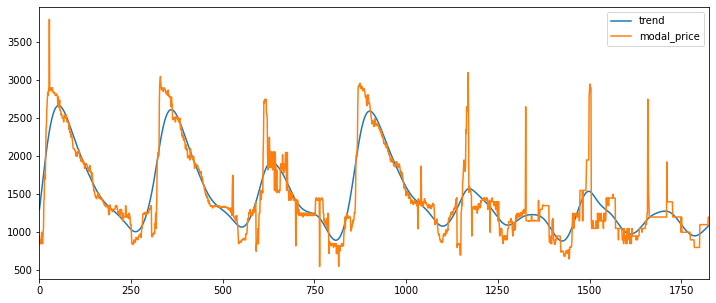

In [ ]:
data[['trend','modal_price']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

___
# Stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.<br>


In [ ]:
#Grouping Sales month
df2=data.groupby(['year_month']).sum()["modal_price"]
print(df2.head)

<bound method NDFrame.head of year_month
2020-01    237805
2020-02    170365
2020-03    169150
2020-04    250860
2020-05    273065
2020-06    256575
2020-07    160180
2020-08    174480
2020-09    215730
2020-10    258395
2020-11    281530
2020-12    245470
Name: modal_price, dtype: int64>


In [ ]:
### Stationarity Check with Augmented Dickey-Fuller test

test_result=adfuller(df2)

# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistic','p-value','#Lages Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print("strong evidence against the null hypothesis(Ho),reject Ho. Data has no unit root and Indicating it is stationary")
    else:
        print("weak evidence against the null hypothesis(Ho), time series has a unit root, Indicating it is non-stationary")

        
adfuller_test(df2)

ADF Test Statistic : -3.9879927214694795
p-value : 0.0014747065248930115
#Lages Used : 2
Number of Observations Used : 9
strong evidence against the null hypothesis(Ho),reject Ho. Data has no unit root and Indicating it is stationary


## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor α (alpha), Double Exponential Smoothing adds a second smoothing factor β (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$).

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

data_Sales['DESadd4'] = ExponentialSmoothing(data_Sales['modal_price'], trend='add').fit().fittedvalues.shift(-1)
data_Sales['DESmul4'] = ExponentialSmoothing(data_Sales['modal_price'], trend='mul').fit().fittedvalues.shift(-1)


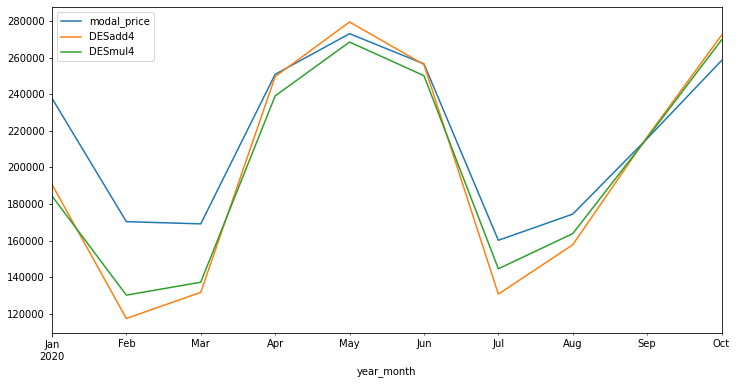

In [ ]:
data_Sales[['modal_price','DESadd4','DESmul4']].iloc[:10].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Train Test Split

In [ ]:
#We have data for 1 years and we want to predict it for MONTHLY. so use 10 months data for train and 2 month data for test.
print(data_Sales.shape)
train,test=data_Sales[0:10],data_Sales[10:]
print(train.shape,test.shape)


(12, 5)
(10, 5) (2, 5)


##  Fitting model on test data

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

fitted_model = ExponentialSmoothing(train['modal_price'], trend='mul').fit()

In [ ]:
test_predictions = fitted_model.forecast(2).rename('Double Exponential Smoothing')

In [ ]:
test_predictions

2020-11-01    276337.260938
2020-12-01    295740.050263
Freq: MS, Name: Double Exponential Smoothing, dtype: float64

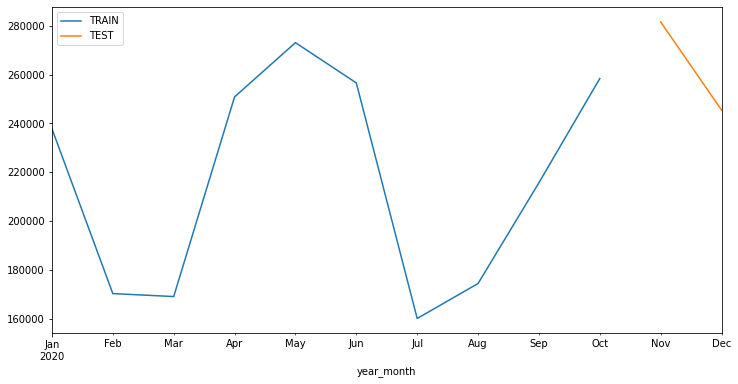

In [ ]:
train['modal_price'].plot(legend=True,label='TRAIN')
test['modal_price'].plot(legend=True,label='TEST',figsize=(12,6));

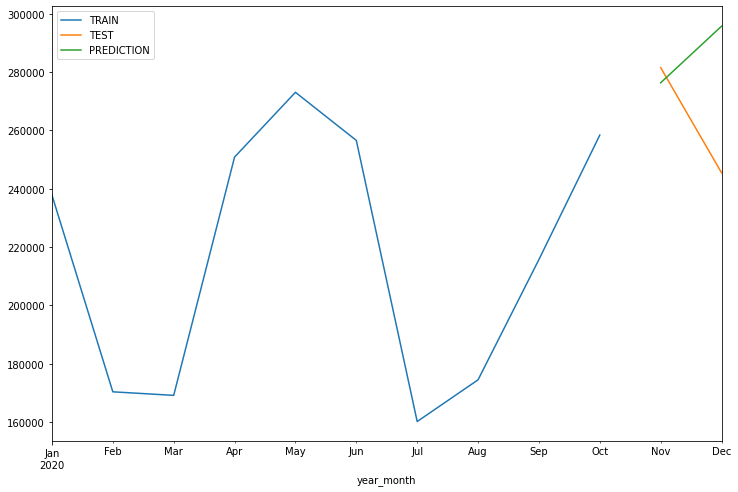

In [ ]:
train['modal_price'].plot(legend=True,label='TRAIN')
test['modal_price'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');


## Evaluation of Models(MSE,RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error

error_mean_absolute_error = mean_absolute_error(test['modal_price'], test_predictions)
print(f'mean_absolute_error: {error_mean_absolute_error:11.10}')

from sklearn.metrics import mean_squared_error

error_MSE = mean_squared_error(test['modal_price'], test_predictions)
print(f' MSE Error: {error_MSE:11.10}')

from statsmodels.tools.eval_measures import rmse

error_RMSE = rmse(test['modal_price'], test_predictions)
print(f' RMSE Error: {error_RMSE:11.10}')


mean_absolute_error: 27731.39466
 MSE Error: 1.277021246e+09
 RMSE Error: 35735.43404


## Retrain the model on the full data (, and forecast the future (Sales for 2020) 

In [ ]:
final_model = ExponentialSmoothing(data_Sales['modal_price'], trend='mul').fit()
model_forecast = final_model.forecast(12)
model_forecast

2021-01-01    249567.974436
2021-02-01    253469.605472
2021-03-01    257432.232814
2021-04-01    261456.810052
2021-05-01    265544.305680
2021-06-01    269695.703337
2021-07-01    273912.002037
2021-08-01    278194.216414
2021-09-01    282543.376963
2021-10-01    286960.530289
2021-11-01    291446.739361
2021-12-01    296003.083764
Freq: MS, dtype: float64

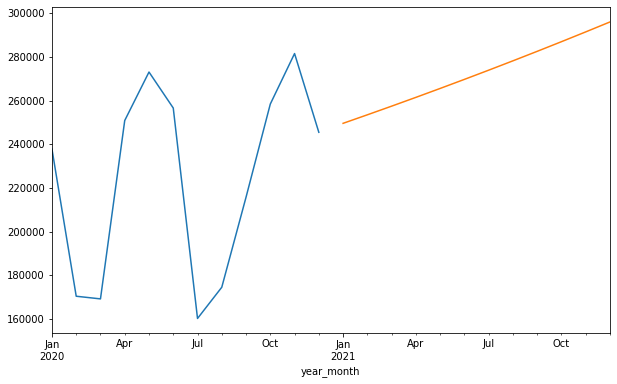

In [ ]:
data_Sales['modal_price'].plot(figsize=(10,6))
model_forecast.plot();

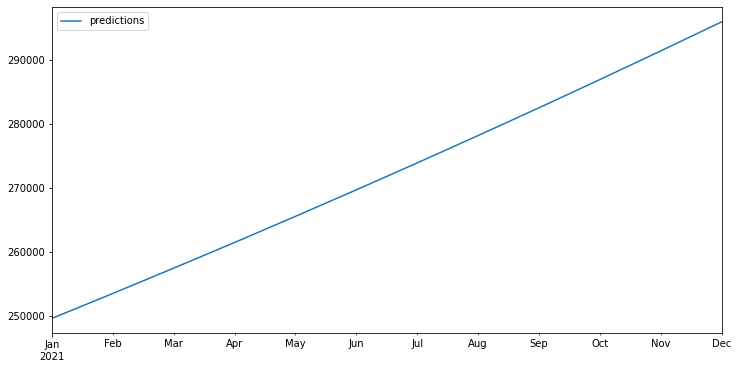

In [ ]:
model_forecast.plot(label='predictions',figsize=(12,6))
plt.legend()
plt.show()





























# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.



In [ ]:
# Set one year for testing
train_data,test_data=data_Sales[0:10],data_Sales[10:]

In [ ]:
train_data.shape

(10, 5)

## Fit an AR(1) Model

In [ ]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train_data['modal_price'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const             162471.089118
L1.modal_price         0.256290
dtype: float64


In [ ]:
# This is the general format for obtaining predictions
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [ ]:
predictions1

2020-11-01    228695.091549
2020-12-01    221083.308002
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [ ]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test_data['modal_price'][i]}")

predicted=228695.0915, expected=281530
predicted=221083.308 , expected=245470


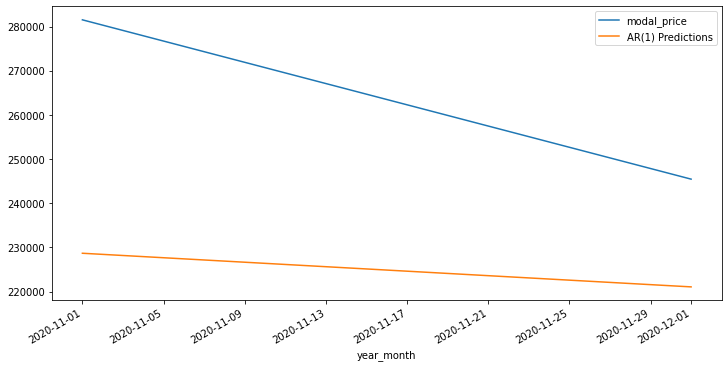

In [ ]:
test['modal_price'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## Fit an AR(2) Model

In [ ]:
# Recall that our model was already created above based on the training set
from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train_data['modal_price'])
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const             275099.449552
L1.modal_price         0.539227
L2.modal_price        -0.798025
dtype: float64


In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

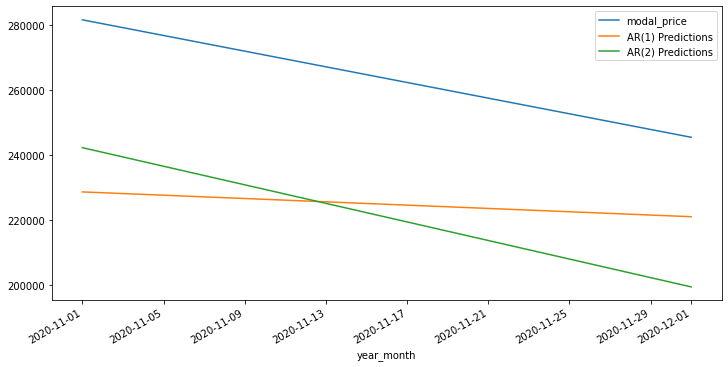

In [ ]:
test_data['modal_price'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

## AR3

In [ ]:
# Recall that our model was already created above based on the training set
from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train_data['modal_price'])
AR3fit = model.fit(maxlag=3,method='mle')
print(f'Lag: {AR3fit.k_ar}')
print(f'Coefficients:\n{AR3fit.params}')

Lag: 3
Coefficients:
const             494035.093352
L1.modal_price        -0.077590
L2.modal_price        -0.436201
L3.modal_price        -0.738496
dtype: float64


In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions3 = AR3fit.predict(start=start, end=end, dynamic=False).rename('AR(3) Predictions')

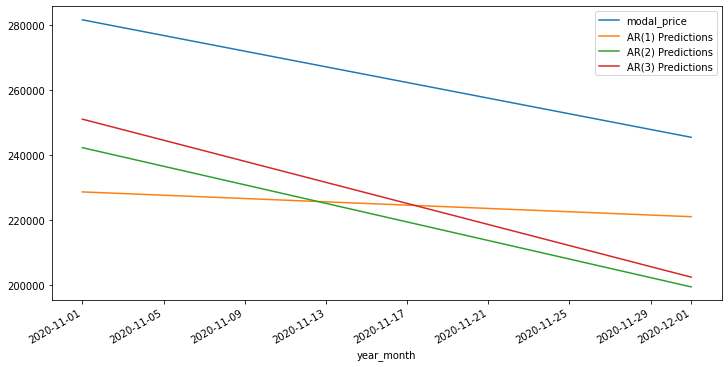

In [ ]:
test_data['modal_price'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6))
predictions3.plot(legend=True,figsize=(12,6));

## AR4

In [ ]:
# Recall that our model was already created above based on the training set
from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train_data['modal_price'])
AR4fit = model.fit(maxlag=4,method='mle')
print(f'Lag: {AR4fit.k_ar}')
print(f'Coefficients:\n{AR4fit.params}')

Lag: 4
Coefficients:
const             746890.903471
L1.modal_price        -0.468565
L2.modal_price        -0.603514
L3.modal_price        -0.794187
L4.modal_price        -0.529762
dtype: float64


In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions4 = AR4fit.predict(start=start, end=end, dynamic=False).rename('AR(4) Predictions')

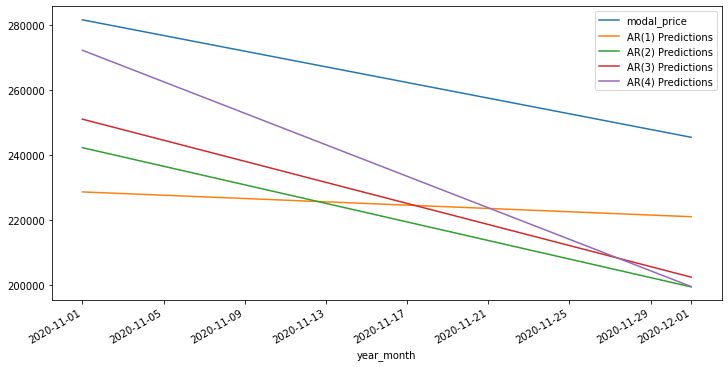

In [ ]:
test_data['modal_price'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6))
predictions3.plot(legend=True,figsize=(12,6))
predictions4.plot(legend=True,figsize=(12,6));

## AR5

In [ ]:
# Recall that our model was already created above based on the training set
from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train_data['modal_price'])
AR5fit = model.fit(maxlag=5,method='mle')
print(f'Lag: {AR5fit.k_ar}')
print(f'Coefficients:\n{AR5fit.params}')

Lag: 5
Coefficients:
const             1.879159e-07
L1.modal_price             NaN
L2.modal_price             NaN
L3.modal_price             NaN
L4.modal_price             NaN
L5.modal_price             NaN
dtype: float64


In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions5 = AR5fit.predict(start=start, end=end, dynamic=False).rename('AR(5) Predictions')

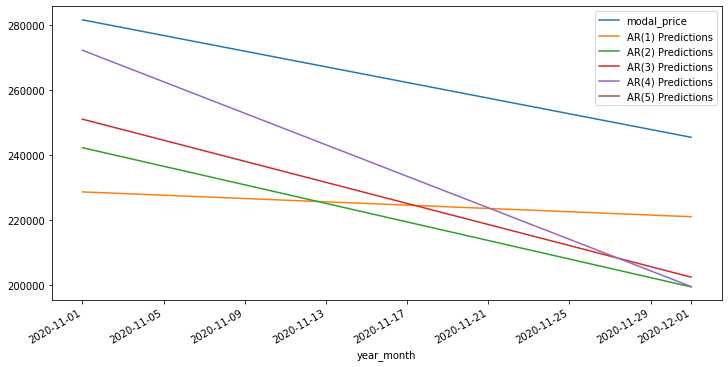

In [ ]:
test_data['modal_price'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6))
predictions3.plot(legend=True,figsize=(12,6))
predictions4.plot(legend=True,figsize=(12,6))
predictions5.plot(legend=True,figsize=(12,6));

## AR6

In [ ]:
# Recall that our model was already created above based on the training set
from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train_data['modal_price'])
AR6fit = model.fit(maxlag=6,method='mle')
print(f'Lag: {AR6fit.k_ar}')
print(f'Coefficients:\n{AR6fit.params}')

Lag: 6
Coefficients:
const             0.247017
L1.modal_price    0.777401
L2.modal_price    0.593757
L3.modal_price   -0.788715
L4.modal_price    0.598406
L5.modal_price    0.772544
L6.modal_price   -0.997131
dtype: float64


In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions6 = AR6fit.predict(start=start, end=end, dynamic=False).rename('AR(6) Predictions')

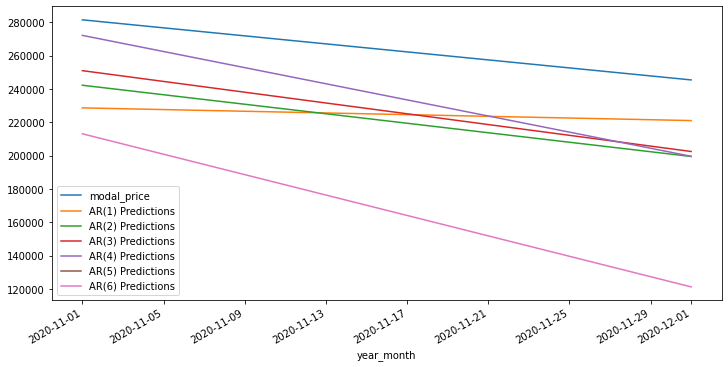

In [ ]:
test_data['modal_price'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6))
predictions3.plot(legend=True,figsize=(12,6))
predictions4.plot(legend=True,figsize=(12,6))
predictions5.plot(legend=True,figsize=(12,6))
predictions6.plot(legend=True,figsize=(12,6));

## Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [ ]:
from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train_data['modal_price'])
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 7
Coefficients:
const             0.123108
L1.modal_price    1.645965
L2.modal_price   -0.073716
L3.modal_price   -1.349519
L4.modal_price    1.334220
L5.modal_price    0.205789
L6.modal_price   -1.666708
L7.modal_price    0.903508
dtype: float64


In [ ]:
start = len(train_data)
end = len(train_data)+len(test_data)-1
rename = f'AR(7) Predictions'

predictions7 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

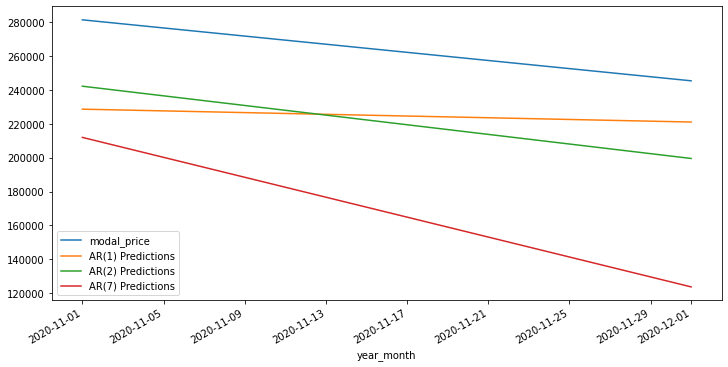

In [ ]:
test['modal_price'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions7.plot(legend=True,figsize=(12,6));

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [ ]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(3)', 'AR(4)', 'AR(7)']
preds = [predictions1, predictions2, predictions3, predictions4, predictions7]  # these are variables, not strings!

for i in range(5):
    error = mean_squared_error(test['modal_price'], preds[i])
    print(f'{labels[i]} Error: {error}')

AR(1) Error: 1693119148.8363733
AR(2) Error: 1825475703.348022
AR(3) Error: 1386998924.066228
AR(4) Error: 1093649871.3041933
AR(7) Error: 9844865744.253319


We see right away how well AR(8) outperformed the other two models.

Another method is the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> (AIC), which does a better job of evaluating models by avoiding overfitting.<br>
Fortunately this is available directly from the fit model object.

## Evaluation of Models(MSE,RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error

error_mean_absolute_error = mean_absolute_error(test_data['modal_price'], predictions3)
print(f'mean_absolute_error: {error_mean_absolute_error:11.10}')

from sklearn.metrics import mean_squared_error

error_MSE = mean_squared_error(test_data['modal_price'], predictions3)
print(f'MSE Error: {error_MSE:11.10}')

from statsmodels.tools.eval_measures import rmse

error_RMSE = rmse(test_data['modal_price'], predictions3)
print(f'RMSE Error: {error_RMSE:11.10}')


mean_absolute_error: 36719.16614
MSE Error: 1.386998924e+09
RMSE Error: 37242.43445


## Retrain the model on the full data, and forecast the future (Sales for 2020) 

In [ ]:
# First, retrain the model on the full dataset
model = AR(data_Sales['modal_price'])

# Next, fit the model
ARfit = model.fit(maxlag=3,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(data_Sales), end=len(data_Sales)+11, dynamic=False).rename('Forecast')

fcast

2021-01-01    180160.117901
2021-02-01    171319.015303
2021-03-01    220145.825257
2021-04-01    271776.086105
2021-05-01    264259.007458
2021-06-01    210868.868880
2021-07-01    173998.585521
2021-08-01    195827.444033
2021-09-01    247923.419620
2021-10-01    269352.620864
2021-11-01    236871.018894
2021-12-01    190543.879842
Freq: MS, Name: Forecast, dtype: float64

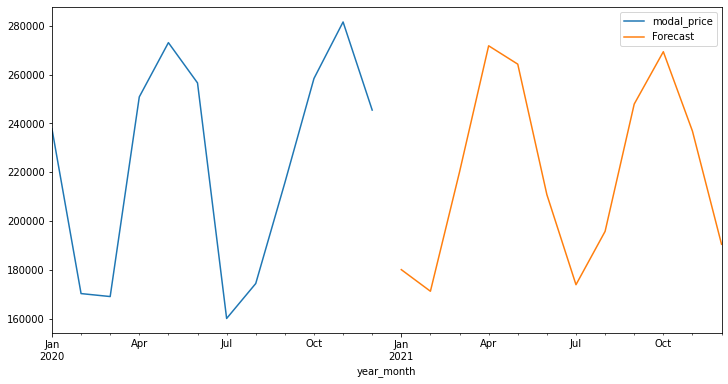

In [ ]:

# Plot the results
data_Sales['modal_price'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

# ARMA(p,q) and ARIMA(p,d,q)

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<strong>Moving Averages</strong> we've already seen with EWMA and the Holt-Winters Method.<br>
<strong>Integration</strong> will apply differencing to make a time series stationary, which ARIMA requires.<br>
<strong>Autoregression</strong> the term autoregression describes a regression of the variable against itself. An autoregression is run against a set of lagged values of order p.

we'll investigate how to best choose the $p$, $d$ and $q$ values required by the model.


# Autoregressive Moving Averages  : ARMA(p,q)

Recall that an <strong>AR(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

while an <strong>MA(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

where $c$ is a constant, $\mu$ is the expectation of $y_{t}$ (often assumed to be zero), $\phi_1$ (phi-sub-one) is the AR lag coefficient, $\theta_1$ (theta-sub-one) is the MA lag coefficient, and $\varepsilon$ (epsilon) is white noise.

An <strong>ARMA(1,1)</strong> model therefore follows

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


 The model is usually referred to as the ARMA(p,q) model where <strong>p</strong> is the order of the AR part and <strong>q</strong> is the order of the MA part. 




Choosing p and q

1) Finding appropriate values of p and q in the ARMA(p,q) model can be facilitated by plotting the partial autocorrelation functions (PACF) for an estimate of p, and likewise using the autocorrelation functions(ACF) for an estimate of q.
 
2) With the help of Auto-ARIMA from pmdarima tool from statsmodels.
 
3) Further information can be gleaned by considering the same functions for the residuals of a model fitted with an initial selection of p and q. Brockwell & Davis recommend using Akaike information criterion (AIC) for finding p and q. 

## ACF Plots

In [ ]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
# Let's look first at the ACF array. By default acf() returns 40 lags
acf(data_Sales['modal_price'])

array([ 1.        ,  0.37039226, -0.44272594, -0.62708   , -0.13321931,
        0.39300611,  0.30596406,  0.0209043 , -0.20881415, -0.1740686 ,
       -0.01720281,  0.01284408])

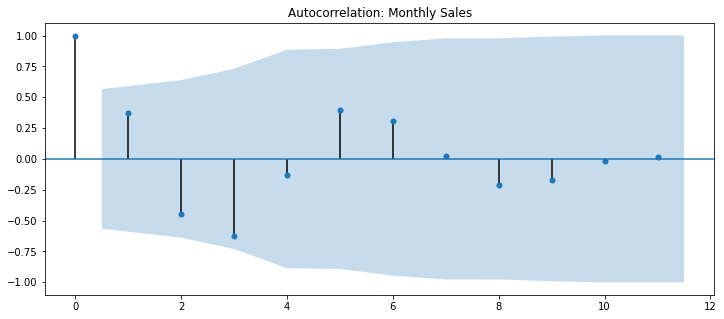

<Figure size 864x576 with 0 Axes>

In [ ]:
# Now let's plot the autocorrelation at different lags
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

title='Autocorrelation: Monthly Sales'
lags = 11
fig = plt.figure(figsize=(12,8))
plot_acf(data_Sales['modal_price'],title=title,lags=lags,ax=ax);

## PACF Plots

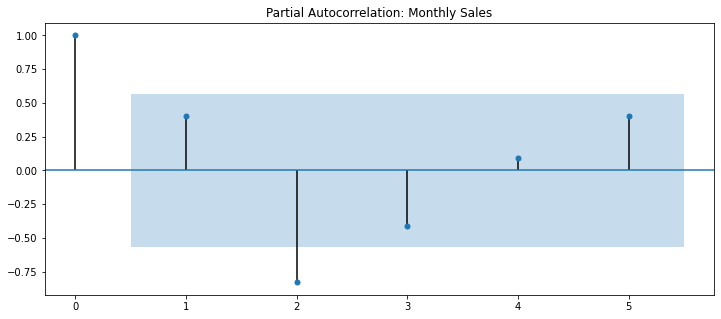

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

title='Partial Autocorrelation: Monthly Sales'
plot_pacf(data_Sales['modal_price'],title=title,lags=5,ax=ax);

## pmdarima Auto-ARIMA


In [ ]:
from pmdarima import auto_arima

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

auto_arima(data_Sales['modal_price'])

ARIMA(maxiter=50, method='lbfgs', order=(3, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
auto_arima(data_Sales['modal_price'],error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -136.427
Date:                Tue, 04 May 2021   AIC                            282.853
Time:                        17:43:16   BIC                            285.278
Sample:                             0   HQIC                           281.955
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.233e+05   7.53e+04      5.620      0.000    2.76e+05    5.71e+05
ar.L1          0.1470      0.306      0.480      0.631      -0.453       0.747
ar.L2         -0.4228      0.336     -1.257      0.209      -1.082       0.236
ar.L3         -0.6195      0.336     -1.846      0.065      -1.277       0.038
sigma2      3.392e+08      3.653   9.29e+07      0.000    3.39e+08    3.39e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.51   Prob(JB):                         0.70
Heteroskedasticity (H):               1.30   Skew:                            -0.10
Prob(H) (two-sided):                  0.80   Kurtosis:                         1.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.8e+25. Standard errors may be unstable.
"""

### We have determine the (p,q) ARMA Orders using <tt>pmdarima.auto_arima</tt>
That is ARMA(0,0)

In [ ]:
# Set one year for testing
train_data_Sales,test_data_Sales=data_Sales[0:10],data_Sales[10:]

In [ ]:
train_data_Sales.shape, test_data_Sales.shape


((10, 5), (2, 5))

### Fit an ARMA(p,q) Model


In [ ]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

model = ARMA(train_data_Sales['modal_price'], order=(0,1))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            modal_price   No. Observations:                   10
Model:                     ARMA(0, 1)   Log Likelihood                -119.448
Method:                       css-mle   S.D. of innovations          36531.148
Date:                Tue, 04 May 2021   AIC                            244.897
Time:                        17:43:17   BIC                            245.804
Sample:                    01-01-2020   HQIC                           243.901
                         - 10-01-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.204e+05   1.76e+04     12.516      0.000    1.86e+05    2.55e+05
ma.L1.modal_price     0.5739      0.250      2.296      0.022       0.084       1.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.7426           +0.0000j            1.7426            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
start=len(train_data_Sales)
end=len(train_data_Sales)+len(test_data_Sales)-1
predictions = results.predict(start=start, end=end).rename('ARMA(0,1) Predictions')
predictions


2020-11-01    242831.234253
2020-12-01    220418.447075
Freq: MS, Name: ARMA(0,1) Predictions, dtype: float64

### Plot predictions against known values

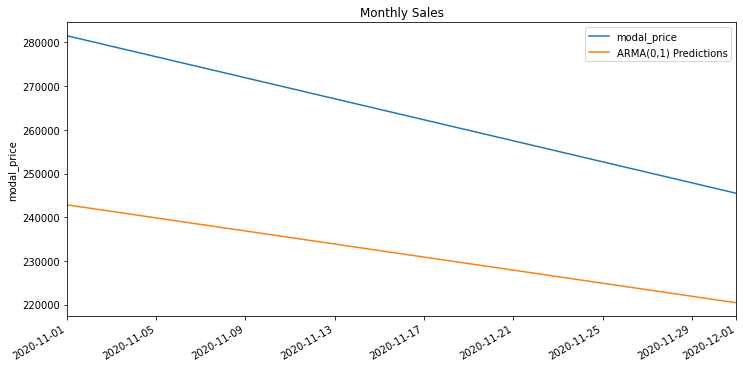

In [ ]:
title = 'Monthly Sales'
ylabel='modal_price'
xlabel='' # we don't really need a label here

ax = test_data_Sales['modal_price'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Evaluation of Models(MSE,RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error

error_mean_absolute_error = mean_absolute_error(test_data_Sales['modal_price'], predictions)
print(f'ARMA(0,1) mean_absolute_error: {error_mean_absolute_error:11.10}')

from sklearn.metrics import mean_squared_error

error_MSE = mean_squared_error(test_data_Sales['modal_price'], predictions)
print(f'ARMA(0,1) MSE Error: {error_MSE:11.10}')

from statsmodels.tools.eval_measures import rmse

error_RMSE = rmse(test_data_Sales['modal_price'], predictions)
print(f'ARMA(0,1) RMSE Error: {error_RMSE:11.10}')

ARMA(0,1) mean_absolute_error: 31875.15934
ARMA(0,1) MSE Error: 1.062587387e+09
ARMA(0,1) RMSE Error: 32597.35246


In [ ]:
model = ARMA(train_data_Sales['modal_price'],order=(0,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            modal_price   No. Observations:                   10
Model:                     ARMA(0, 1)   Log Likelihood                -119.448
Method:                       css-mle   S.D. of innovations          36531.148
Date:                Tue, 04 May 2021   AIC                            244.897
Time:                        17:43:17   BIC                            245.804
Sample:                    01-01-2020   HQIC                           243.901
                         - 10-01-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.204e+05   1.76e+04     12.516      0.000    1.86e+05    2.55e+05
ma.L1.modal_price     0.5739      0.250      2.296      0.022       0.084       1.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.7426           +0.0000j            1.7426            0.5000
-----------------------------------------------------------------------------
"""

## Retrain the model on the full data, and forecast the future (Sales for 2020) 

In [ ]:
model = ARMA(data_Sales['modal_price'],order=(0,1))
results = model.fit()
fcast = results.predict(len(data_Sales),len(data_Sales)+2,typ='levels').rename('ARMA(0,1) Forecast')
fcast

2021-01-01    225832.399111
2021-02-01    225914.043319
2021-03-01    225914.043319
Freq: MS, Name: ARMA(0,1) Forecast, dtype: float64

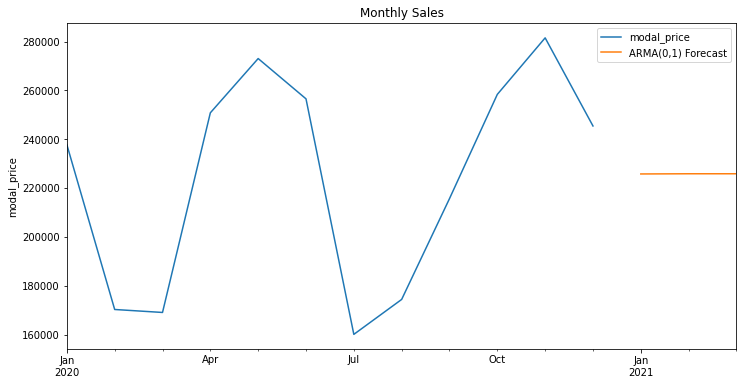

In [ ]:
title = 'Monthly Sales'
ylabel='modal_price'
xlabel='' # we don't really need a label here

ax = data_Sales['modal_price'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Autoregressive Integrated Moving Average - ARIMA(p,d,q)
The steps are the same as for ARMA(p,q), except that we'll apply a differencing component to make the dataset stationary.<br>

Autoregressive Independent Moving Average is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


#### We have determined the  ARIMA(p,d,q)  Orders using <tt>pmdarima.auto_arima</tt>
That is ARIMA(0,0,0)

### Split the data into train/test sets

In [ ]:
# Set one year for testing
train_data_Sales,test_data_Sales=data_Sales[0:10],data_Sales[10:]

### Fit an ARIMA(p,d,q) Model

In [ ]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

model = ARIMA(data_Sales['modal_price'],order=(0,0,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            modal_price   No. Observations:                   12
Model:                     ARMA(0, 1)   Log Likelihood                -142.702
Method:                       css-mle   S.D. of innovations          34474.931
Date:                Tue, 04 May 2021   AIC                            291.404
Time:                        17:43:18   BIC                            292.859
Sample:                    01-01-2020   HQIC                           290.866
                         - 12-01-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.259e+05   1.61e+04     14.031      0.000    1.94e+05    2.57e+05
ma.L1.modal_price     0.6709      0.215      3.125      0.002       0.250       1.092
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4905           +0.0000j            1.4905            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
# Obtain predicted values
start=len(train_data_Sales)
end=len(train_data_Sales)+len(test_data_Sales)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(0,0,1) Predictions')

In [ ]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_data_Sales['modal_price'][i]}")

predicted=252197.0675, expected=281530
predicted=245591.6945, expected=245470


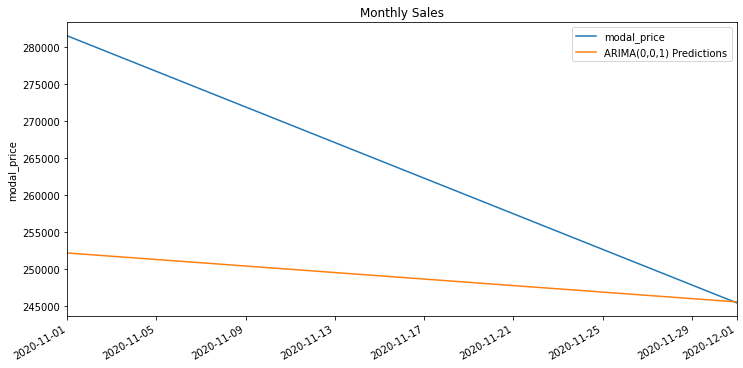

In [ ]:
# Plot predictions against known values
title = 'Monthly Sales'
ylabel='modal_price'
xlabel='' # we don't really need a label here

ax = test_data_Sales['modal_price'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


## Evaluation of Models(MSE,RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error

error_mean_absolute_error = mean_absolute_error(test_data_Sales['modal_price'], predictions)
print(f'ARIMA(0,0,1) mean_absolute_error: {error_mean_absolute_error:11.10}')

from sklearn.metrics import mean_squared_error

error_MSE = mean_squared_error(test_data_Sales['modal_price'], predictions)
print(f'ARIMA(0,0,1) MSE Error: {error_MSE:11.10}')

from statsmodels.tools.eval_measures import rmse

error_RMSE = rmse(test_data_Sales['modal_price'], predictions)
print(f'ARIMA(0,0,1) RMSE Error: {error_RMSE:11.10}')

ARIMA(0,0,1) mean_absolute_error: 14727.31349
ARIMA(0,0,1) MSE Error: 430217869.1
ARIMA(0,0,1) RMSE Error: 20741.69398


## Retrain the model on the full data, and forecast the future (Sales for 2020) 

In [ ]:

model = ARIMA(data_Sales['modal_price'],order=(0,0,1))
results = model.fit()
fcast = results.predict(len(data_Sales),len(data_Sales)+2,typ='levels').rename('ARIMA(0,0,1) Forecast')
fcast

2021-01-01    225832.399111
2021-02-01    225914.043319
2021-03-01    225914.043319
Freq: MS, Name: ARIMA(0,0,1) Forecast, dtype: float64

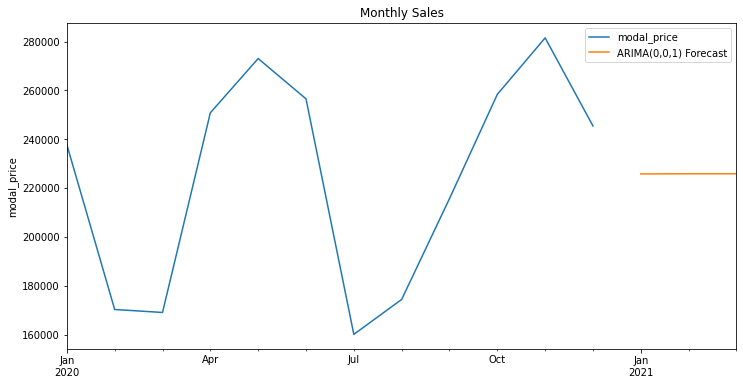

In [ ]:
# Plot predictions against known values
title = 'Monthly Sales'
ylabel='modal_price'
xlabel='' # we don't really need a label here

ax = data_Sales['modal_price'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


# SARIMA(p,d,q)(P,D,Q)m
# Seasonal Autoregressive Integrated Moving Averages

ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables.



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders

#### For SARIMA Orders we set seasonal=True and pass in an m value

In [ ]:
auto_arima(data_Sales['modal_price'],seasonal=True,m=2).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                   12
Model:             SARIMAX(0, 1, 0, 2)   Log Likelihood                -126.520
Date:                 Tue, 04 May 2021   AIC                            255.039
Time:                         17:43:19   BIC                            255.342
Sample:                              0   HQIC                           254.707
                                  - 12                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.678e+09   3.46e+09      1.353      0.176    -2.1e+09    1.15e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 1.01
Prob(Q):                              0.34   Prob(JB):                         0.60
Heteroskedasticity (H):               0.52   Skew:                            -0.39
Prob(H) (two-sided):                  0.61   Kurtosis:                         1.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This provides an ARIMA Order of (1,0,0) combined with a seasonal order of (1,0,(1,2),12) Now let's train & test the SARIMA(1,0,0)(1,0,(1,2),12) model, evaluate it, then produce a forecast of future values.
### Split the data into train/test sets

In [ ]:
# Set one year for testing
train_Sales_data,test_Sales_data=data_Sales[0:10],data_Sales[10:]

### Fit a SARIMA(1,0,0)(1,0,(1,2),12) Model

In [ ]:
model = SARIMAX(train_Sales_data['modal_price'],order=(0,0,1),seasonal_order=(0, 1, 0, 2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        modal_price   No. Observations:                   10
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 2)   Log Likelihood                -101.576
Date:                            Tue, 04 May 2021   AIC                            207.153
Time:                                    17:43:19   BIC                            207.311
Sample:                                01-01-2020   HQIC                           206.081
                                     - 10-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5240      0.494      1.060      0.289      -0.445       1.492
sigma2      7.315e+09   3.44e-11   2.13e+20      0.000    7.32e+09    7.32e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.75   Prob(JB):                         0.84
Heteroskedasticity (H):               0.26   Skew:                            -0.03
Prob(H) (two-sided):                  0.30   Kurtosis:                         1.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+37. Standard errors may be unstable.
"""

In [ ]:
# Obtain predicted values
start=len(train_Sales_data)
end=len(train_Sales_data)+len(test_Sales_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,0,1)(0, 1, 0, 2) Predictions')

In [ ]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_Sales_data['modal_price'][i]}")

predicted=240674.3541, expected=281530
predicted=258395.0   , expected=245470


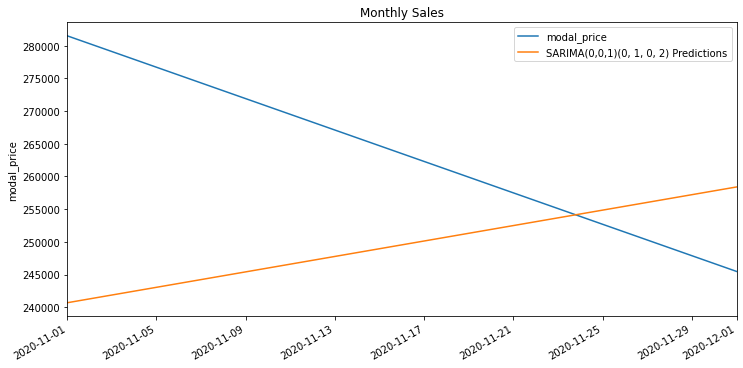

In [ ]:
# Plot predictions against known values
title = 'Monthly Sales'
ylabel='modal_price'
xlabel=''

ax = test_Sales_data['modal_price'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Evaluation of Models(MSE,RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error

error_mean_absolute_error = mean_absolute_error(test_Sales_data['modal_price'], predictions)
print(f'SARIMA(0,0,1)(0, 1, 0, 2) Predictions mean_absolute_error: {error_mean_absolute_error:11.10}')

from sklearn.metrics import mean_squared_error

error_MSE = mean_squared_error(test_Sales_data['modal_price'], predictions)
print(f'SARIMA(0,0,1)(0, 1, 0, 2) Predictions MSE Error: {error_MSE:11.10}')

from statsmodels.tools.eval_measures import rmse

error_RMSE = rmse(test_Sales_data['modal_price'], predictions)
print(f'SARIMA(0,0,1)(0, 1, 0, 2) Predictions RMSE Error: {error_RMSE:11.10}')

SARIMA(0,0,1)(0, 1, 0, 2) Predictions mean_absolute_error: 26890.32296
SARIMA(0,0,1)(0, 1, 0, 2) Predictions MSE Error: 918119714.5
SARIMA(0,0,1)(0, 1, 0, 2) Predictions RMSE Error: 30300.49033


## Retrain the model on the full data, and forecast the future (Sales for 2020) 

In [ ]:
model = SARIMAX(data_Sales['modal_price'],order=(1,0,0),seasonal_order=(0,1,0,2))
results = model.fit()
fcast = results.predict(len(data_Sales),len(data_Sales)+2,typ='levels').rename('SARIMA(0,0,1)(0, 1, 0, 2) Predictions')
fcast

2021-01-01    280749.356926
2021-02-01    245422.850785
2021-03-01    280746.509211
Freq: MS, Name: SARIMA(0,0,1)(0, 1, 0, 2) Predictions, dtype: float64

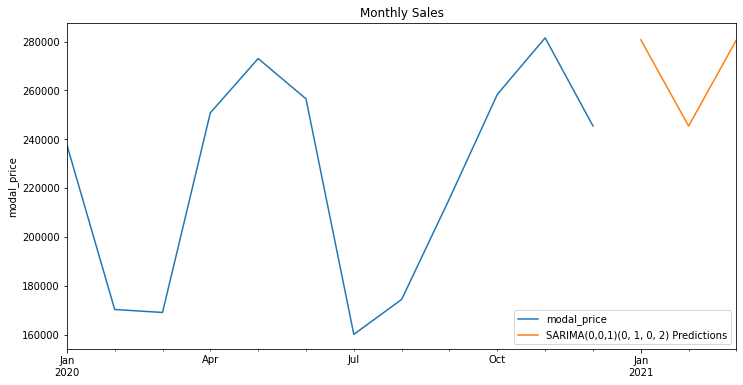

In [ ]:
# Plot predictions against known values
title = 'Monthly Sales'
ylabel='modal_price'
xlabel=''

ax = data_Sales['modal_price'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

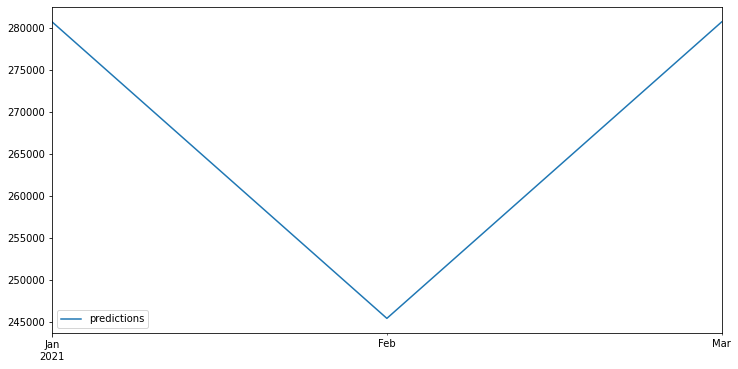

In [ ]:
fcast.plot(label='predictions',figsize=(12,6))
plt.legend()
plt.show()

### Final conclusion 

RMSE : Root Mean Square Error  
The less RMSE indicates the better model.

___
                model                                |      RMSE
                1. Double Exponential Smoothing      |      35735.43404
                2. AR(p)                             |      37242.43445
                3. ARMA                              |      32597.35246
                4. ARIMA                             |      20741.69398
                5. SARIMA                            |      280746.509211
               

>Best Model : ARIMA


In [ ]:
model = ARIMA(data_Sales['modal_price'],order=(0,0,1))
results = model.fit()
fcast = results.predict(len(data_Sales),len(data_Sales)+2,typ='levels').rename('ARIMA(0,0,1) Forecast')
fcast

2021-01-01    225832.399111
2021-02-01    225914.043319
2021-03-01    225914.043319
Freq: MS, Name: ARIMA(0,0,1) Forecast, dtype: float64